# Mobile Price Classification

### 基本名詞解釋
紀錄上網找到的名詞解釋，不一定知道是什麼東西
- The difference between train data set and test data set 
    - https://ithelp.ithome.com.tw/articles/10240556
- Confusion Matrix https://ithelp.ithome.com.tw/articles/10224531
    - 細項 https://ithelp.ithome.com.tw/articles/10222697 
- SVM
    - https://youtu.be/Y6RRHw9uN9o
- KNN
    - https://ithelp.ithome.com.tw/m/articles/10269826
- Decision Tree
    - https://youtu.be/_L39rN6gz7Y
- Random Forest
    - https://youtu.be/J4Wdy0Wc_xQ
    - https://ithelp.ithome.com.tw/articles/10206242
    - Bootstrap aggregating bagging  https://youtu.be/2Mg8QD0F1dQ

In [1]:
# https://www.kaggle.com/code/mateusjorge/mobile-price-classification-using-svm
import numpy as np
import pandas as pd

train = pd.read_csv("train.csv")
# 更換表格名稱
features_mapping = {
    'battery_power': 'battery_power',
    'blue': 'bluetooth',
    'clock_speed': 'clock_speed',
    'dual_sim': 'dual_sim',
    'fc': 'front_camera',
    'four_g': '4g',
    'int_memory': 'int_memory',
    'm_dep': 'mobile_depth',
    'mobile_wt': 'mobile_weight',
    'n_cores': 'number_of_cores',
    'pc': 'primary_camera_px',
    'px_height': 'pixel_resolution_height',
    'px_width': 'pixel_resolution_width',
    'ram': 'ram',
    'sc_h': 'screen_height',
    'sc_w': 'screen_width',
    'talk_time': 'talk_time',
    'three_g': '3g',
    'touch_screen': 'touch_screen',
    'wifi': 'wifi',
    'price_range': 'price_range'
}

train = train.rename(columns=features_mapping)
X = train[['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'front_camera', '4g', 'int_memory', 'mobile_depth', 'mobile_weight', 'number_of_cores', 'primary_camera_px', 'pixel_resolution_height', 'pixel_resolution_width', 'ram', 'screen_height', 'screen_width', 'talk_time', '3g', 'touch_screen', 'wifi']]
y = train['price_range']

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix

seed = 20
np.random.seed(seed=seed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [2]:
def foobar(method):
    method.fit(X_train_sc, y_train)
    preds = method.predict(X_test_sc)
    acc = accuracy_score(y_test, preds)
    print("Accuracy: %.2f%%" % (acc * 100))
    plot_confusion_matrix(method, X_test_sc, y_test)
    class_rep = classification_report(y_test, preds)
    print(class_rep)
    ()

### Result of SVC
Support Vector Machine Classification

Accuracy: 88.80%


/home/dokidokipb/otensor/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.94      0.96      0.95       125
           1       0.82      0.86      0.84       125
           2       0.84      0.82      0.83       125
           3       0.96      0.92      0.94       125

    accuracy                           0.89       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.89      0.89      0.89       500



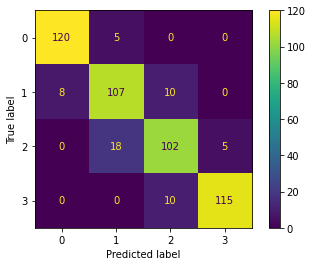

In [3]:
from sklearn.svm import SVC
svc = SVC()
foobar(svc)

### Result of KNN
K-nearest neighbors

Accuracy: 48.00%
              precision    recall  f1-score   support

           0       0.57      0.74      0.65       125
           1       0.33      0.38      0.35       125
           2       0.37      0.36      0.36       125
           3       0.76      0.44      0.56       125

    accuracy                           0.48       500
   macro avg       0.51      0.48      0.48       500
weighted avg       0.51      0.48      0.48       500



/home/dokidokipb/otensor/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


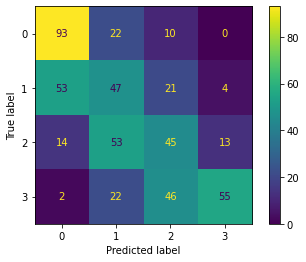

In [4]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
foobar(knn)

### Result of Decision Tree

Accuracy: 79.80%
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       125
           1       0.72      0.78      0.75       125
           2       0.75      0.67      0.71       125
           3       0.84      0.88      0.86       125

    accuracy                           0.80       500
   macro avg       0.80      0.80      0.80       500
weighted avg       0.80      0.80      0.80       500



/home/dokidokipb/otensor/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


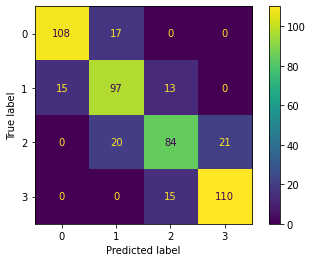

In [5]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
foobar(dt)

### Result of Random Forest

Accuracy: 86.80%
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       125
           1       0.78      0.86      0.82       125
           2       0.88      0.72      0.79       125
           3       0.90      0.96      0.93       125

    accuracy                           0.87       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.87      0.87      0.87       500



/home/dokidokipb/otensor/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


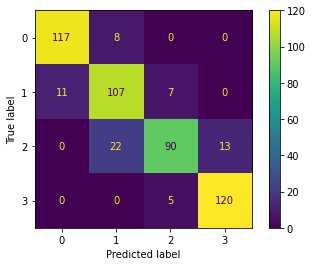

In [6]:
from sklearn.ensemble import RandomForestClassifier
rt = RandomForestClassifier(n_estimators=100, random_state=0)
foobar(rt)